In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# LOAD DATA

In [2]:
df = pd.read_csv("dataset_capstone.csv")

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# BERSIHKAN SPASI COLOM

In [3]:
df.columns = df.columns.str.strip()

# UKURAN DATA (SHAPE)

In [4]:
df.shape

(4269, 13)

# INFO DATA & TIPE KOLOM

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


# CEK DUPLIKASI DATA

In [6]:
df.duplicated().sum()

0

- tidak ada duplikasi data 

# CEK MISSING VALUE

In [7]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

# STATISTIK DESKRIPTIF (NUMERIK)

In [8]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


# STATISTIK DATA KATEGORIKAL

In [9]:
df.describe(include='object')

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


# DISTRIBUSI TARGET

In [10]:
df['loan_status'].value_counts()

loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

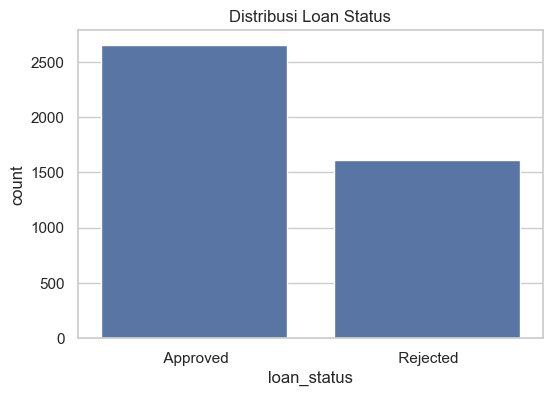

In [11]:
df['loan_status'].value_counts(normalize=True) * 100
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=df)
plt.title("Distribusi Loan Status")
plt.show()

# DISTRIBUSI FITUR NUMERIK

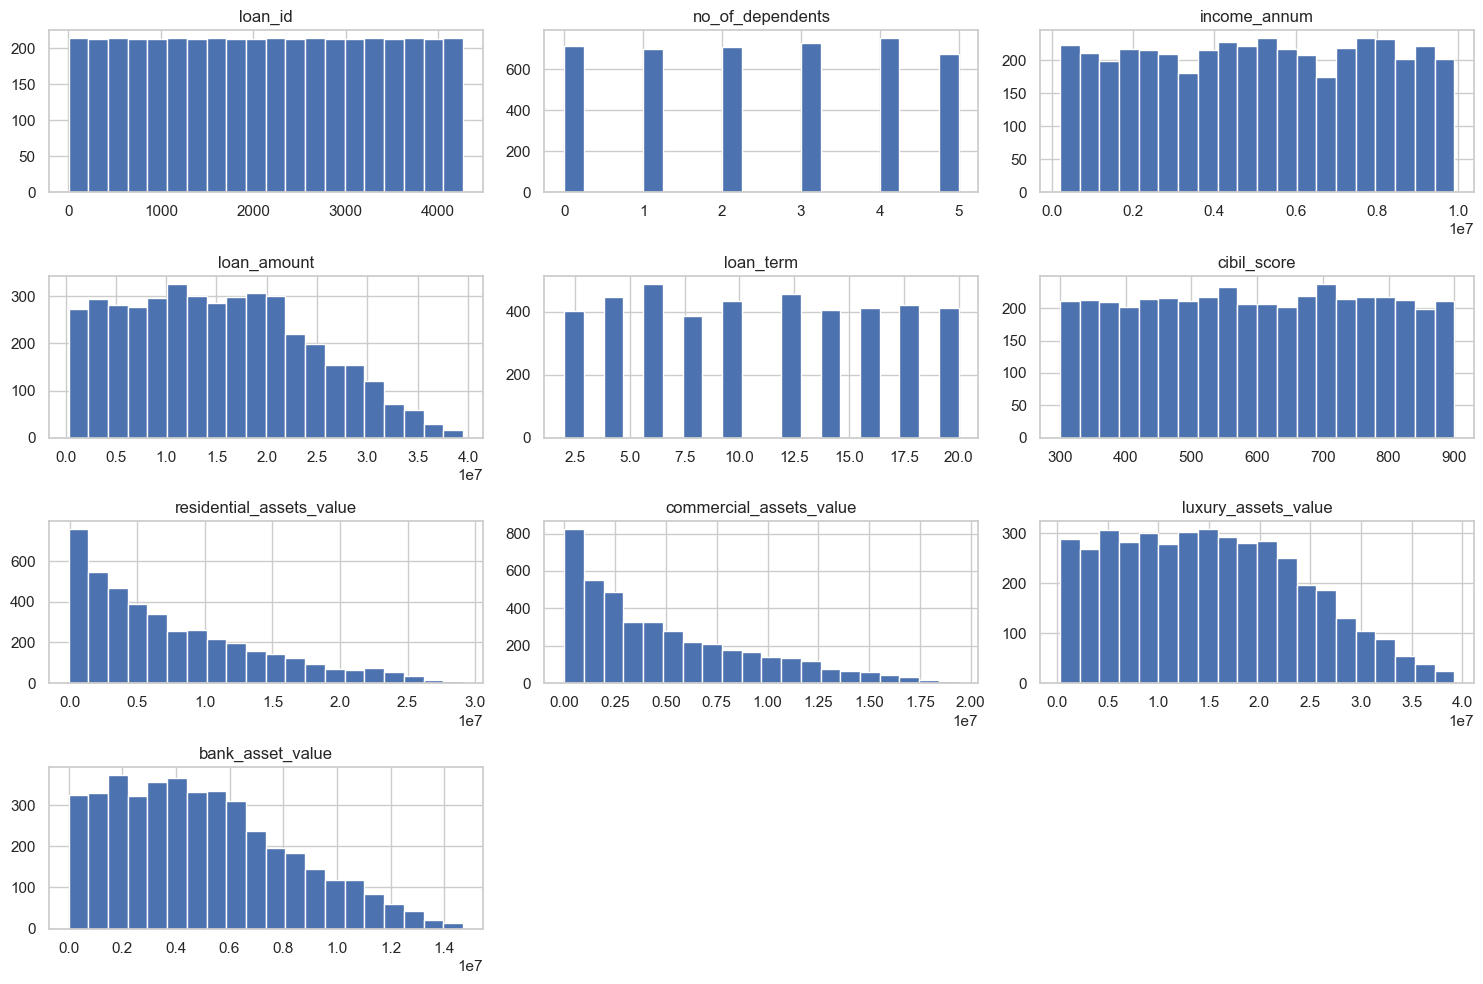

In [12]:
# Pilih kolom numerik
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df[num_cols].hist(figsize=(15,10), bins=20)
plt.tight_layout()
plt.show()

# OUTLIER DETECTION

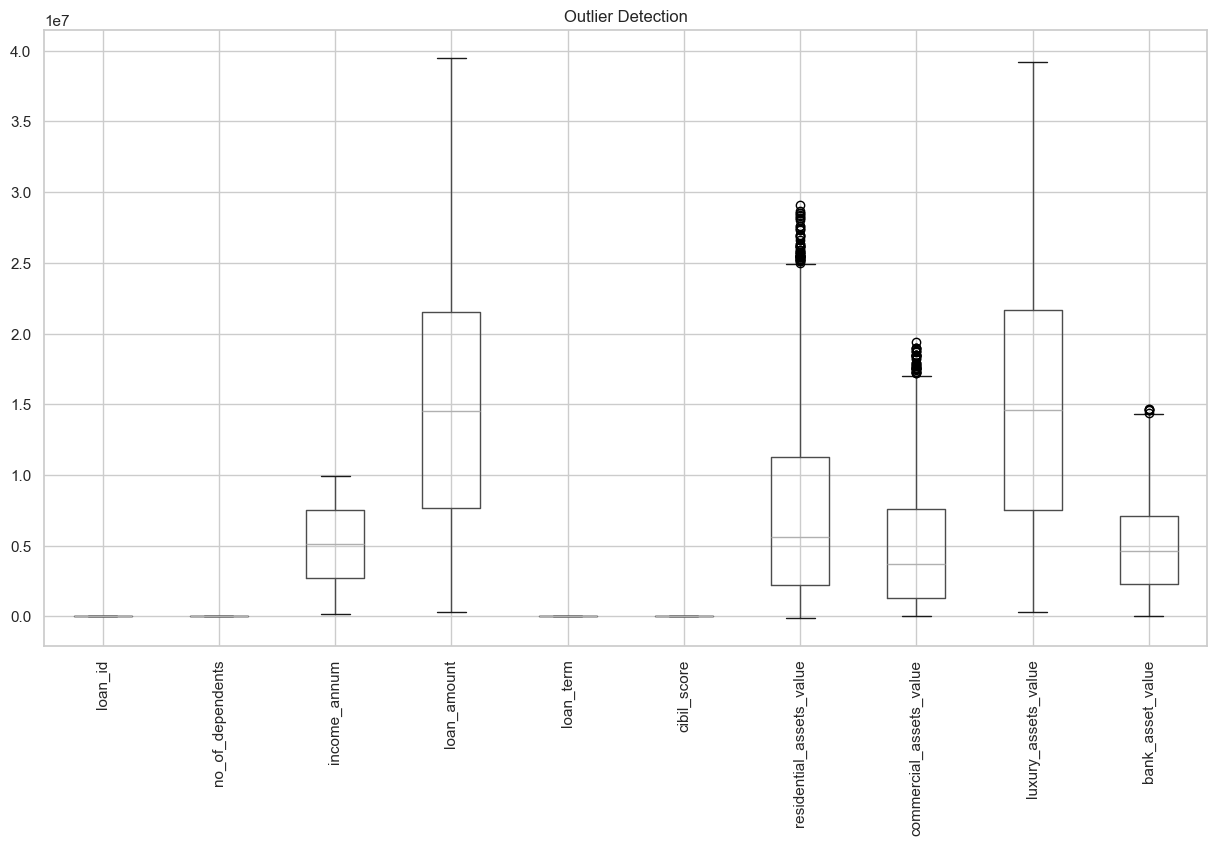

In [13]:
plt.figure(figsize=(15,8))
df[num_cols].boxplot(rot=90)
plt.title("Outlier Detection")
plt.show()

# CORRELATION MATRIX

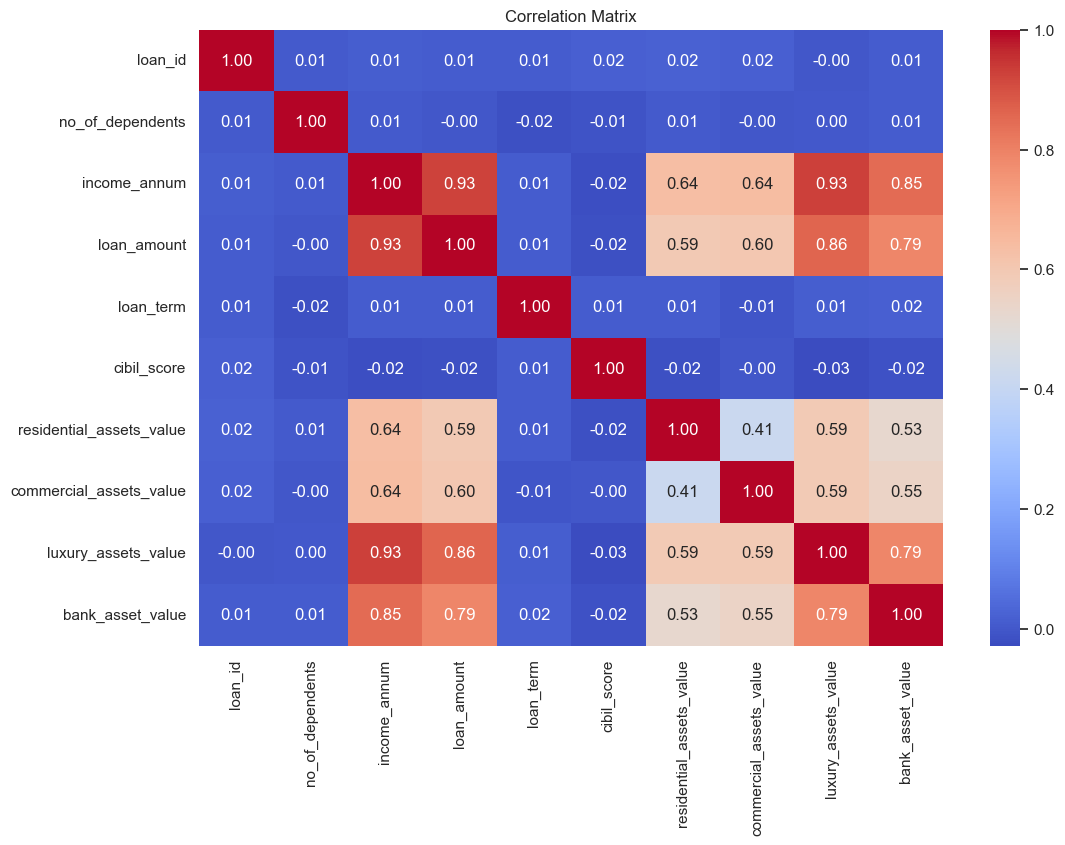

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# FITUR vs TARGET

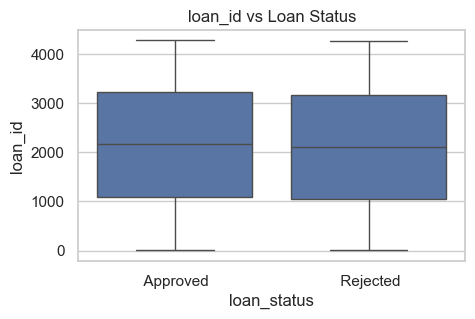

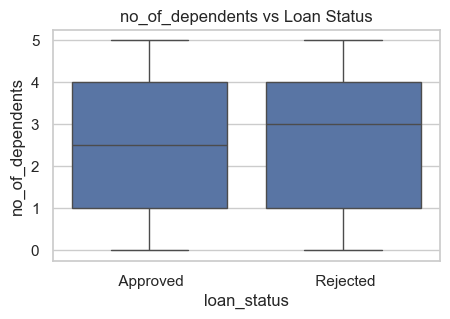

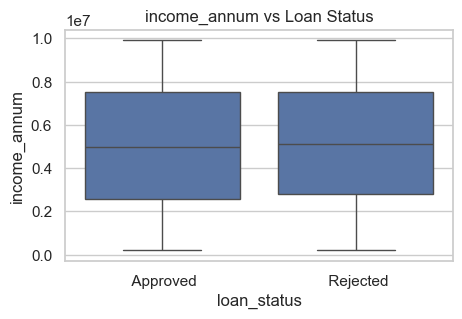

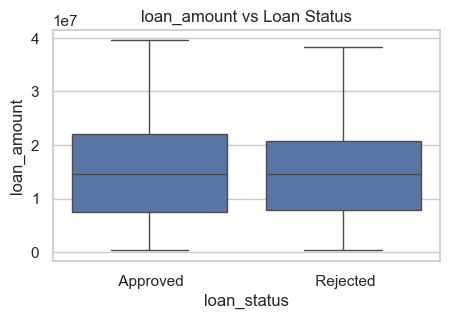

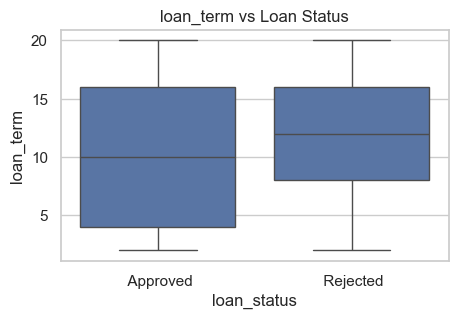

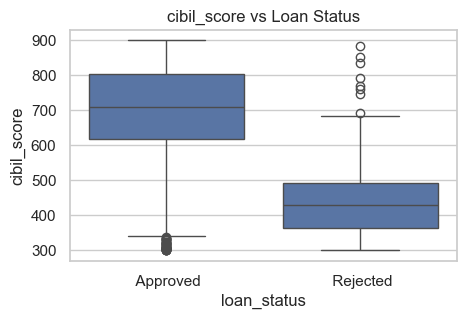

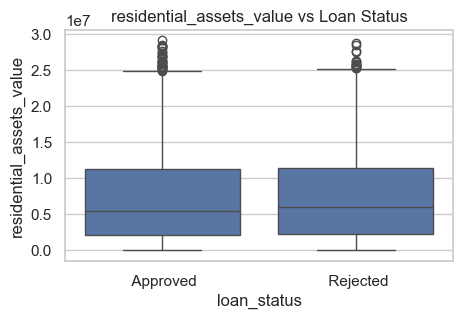

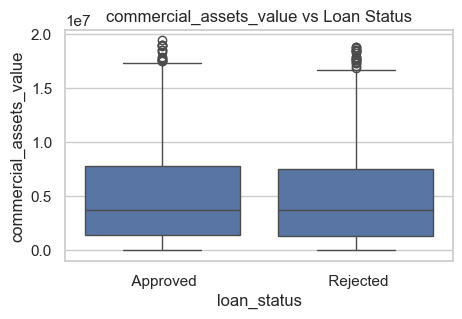

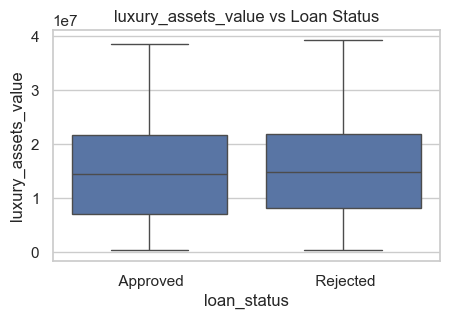

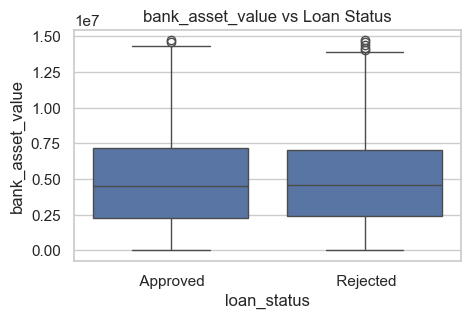

In [15]:
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x='loan_status', y=col, data=df)
    plt.title(f"{col} vs Loan Status")
    plt.show()

# Analisis Distribusi terhadap TARGET

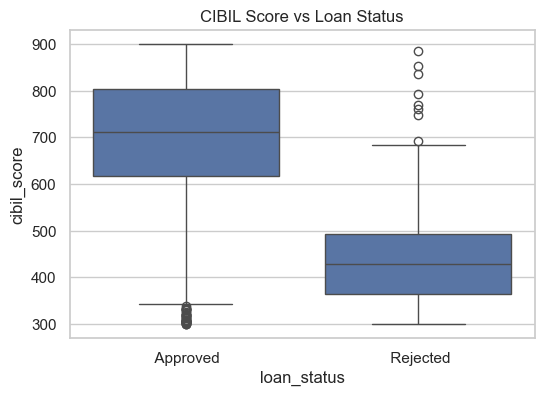

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x='loan_status', y='cibil_score', data=df)
plt.title("CIBIL Score vs Loan Status")
plt.show()

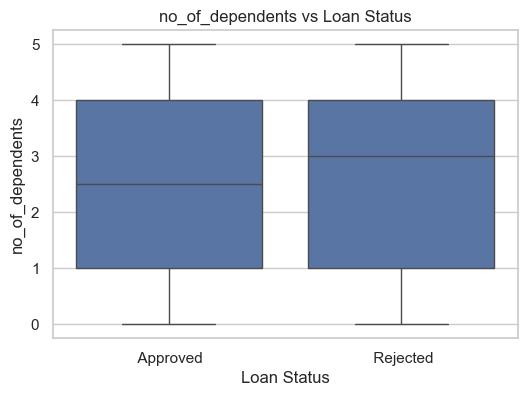

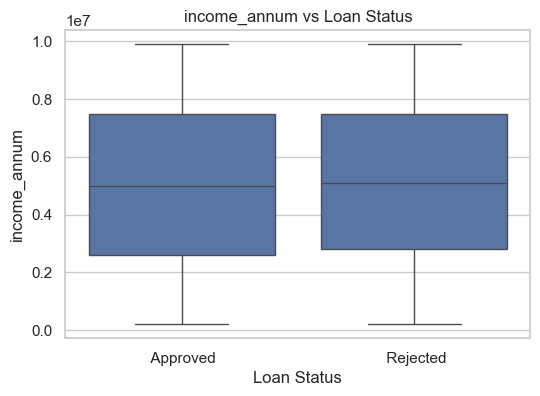

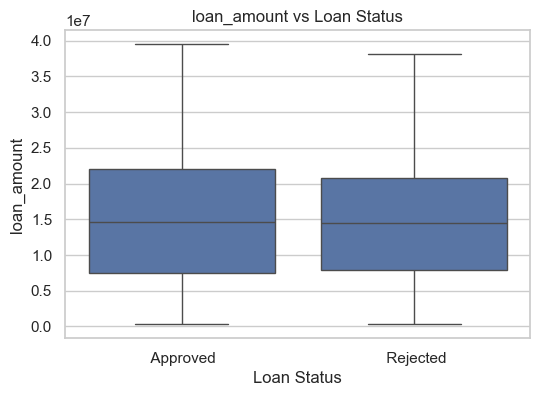

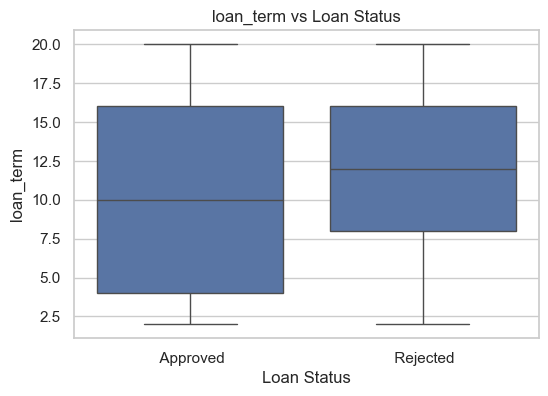

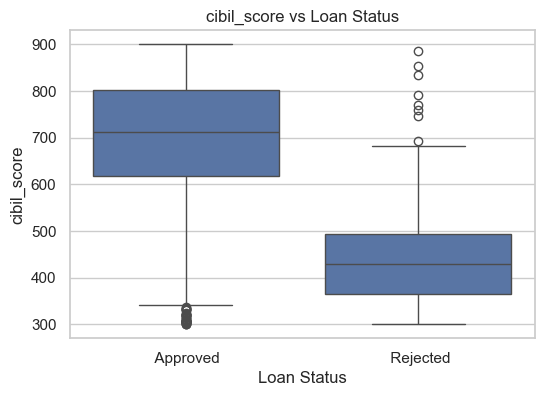

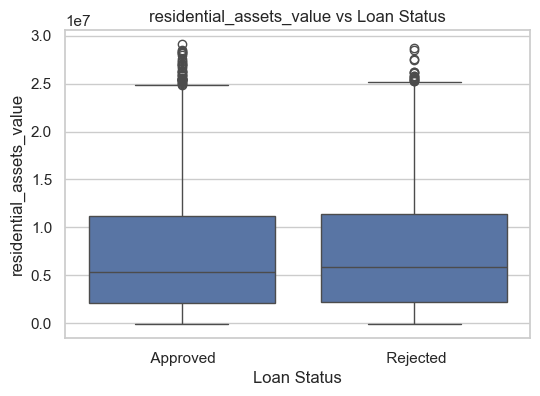

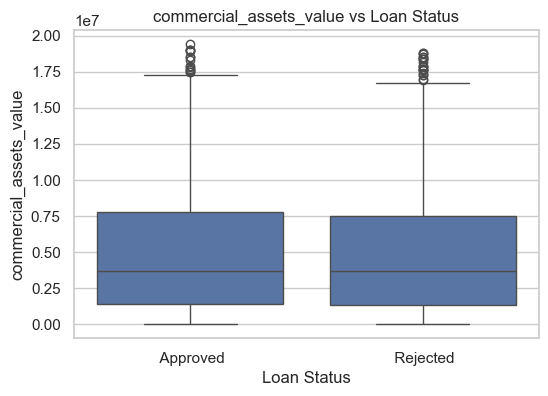

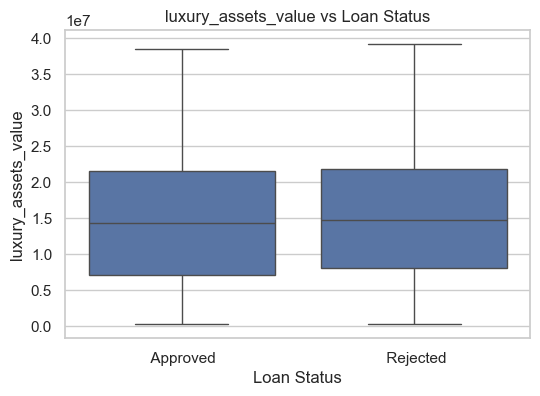

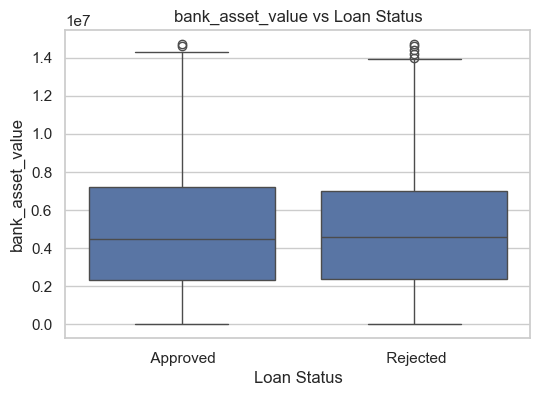

In [17]:
num_cols = [
    'no_of_dependents',
    'income_annum',
    'loan_amount',
    'loan_term',
    'cibil_score',
    'residential_assets_value',
    'commercial_assets_value',
    'luxury_assets_value',
    'bank_asset_value'
]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='loan_status', y=col, data=df)
    plt.title(f"{col} vs Loan Status")
    plt.xlabel("Loan Status")
    plt.ylabel(col)
    plt.show()


In [18]:
df.to_csv('dataset_clean.csv', index=False)